# PROHI HT2024

## OCD Patient Dataset: Demographics & Clinical Data
Source of the data set: https://www.kaggle.com/datasets/ohinhaque/ocd-patient-dataset-demographics-and-clinical-data

### Basic EDA

#### 1. Loading and formatting

a) Load the dataset into a pandas DataFrame.

In [1]:
import pandas as pd
# Pandas provides built-in functions to load text files into DataFrames.
df = pd.read_csv("ocd_patient_dataset.csv")
df.head()

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,1018,32,Female,African,Single,Some College,15/07/2016,203,MDD,No,Harm-related,Checking,17,10,Yes,Yes,SNRI
1,2406,69,Male,African,Divorced,Some College,28/04/2017,180,None,Yes,Harm-related,Washing,21,25,Yes,Yes,SSRI
2,1188,57,Male,Hispanic,Divorced,College Degree,02/02/2018,173,MDD,No,Contamination,Checking,3,4,No,No,Benzodiazepine
3,6200,27,Female,Hispanic,Married,College Degree,25/08/2014,126,PTSD,Yes,Symmetry,Washing,14,28,Yes,Yes,SSRI
4,5824,56,Female,Hispanic,Married,High School,20/02/2022,168,PTSD,Yes,Hoarding,Ordering,39,18,No,No,None


b) Check the total size of the dataset.

In [2]:
df.shape

(1500, 17)

c) Check the variable types.

In [3]:
df.dtypes

Patient ID                        int64
Age                               int64
Gender                           object
Ethnicity                        object
Marital Status                   object
Education Level                  object
OCD Diagnosis Date               object
Duration of Symptoms (months)     int64
Previous Diagnoses               object
Family History of OCD            object
Obsession Type                   object
Compulsion Type                  object
Y-BOCS Score (Obsessions)         int64
Y-BOCS Score (Compulsions)        int64
Depression Diagnosis             object
Anxiety Diagnosis                object
Medications                      object
dtype: object

d) Make sure the data types per column are correct.

In [4]:
"""
# Convert the nominal categorical variables
dataframe["Ethnicity"] = dataframe["Ethnicity"].astype("category")
dataframe["Marital Status"] = dataframe["Marital Status"].astype("category")
dataframe["Previous Diagnoses"] = dataframe["Previous Diagnoses"].astype("category")
dataframe["Obsession Type"] = dataframe["Obsession Type"].astype("category")
dataframe["Compulsion Type"] = dataframe["Compulsion Type"].astype("category")
dataframe["Medications"] = dataframe["Medications"].astype("category")

# Boolean
dataframe["Gender"] = dataframe["Gender"].map({"Male": True, "Female": False})
dataframe["Gender"] = dataframe["Gender"].astype("bool")
dataframe["Family History of OCD"] = dataframe["Family History of OCD"].map({"Yes": True, "No": False})
dataframe["Family History of OCD"] = dataframe["Family History of OCD"].astype("bool")
dataframe["Depression Diagnosis"] = dataframe["Depression Diagnosis"].map({"Yes": True, "No": False})
dataframe["Depression Diagnosis"] = dataframe["Depression Diagnosis"].astype("bool")
dataframe["Anxiety Diagnosis"] = dataframe["Anxiety Diagnosis"].map({"Yes": True, "No": False})
dataframe["Anxiety Diagnosis"] = dataframe["Anxiety Diagnosis"].astype("bool")
"""


'\n# Convert the nominal categorical variables\ndataframe["Ethnicity"] = dataframe["Ethnicity"].astype("category")\ndataframe["Marital Status"] = dataframe["Marital Status"].astype("category")\ndataframe["Previous Diagnoses"] = dataframe["Previous Diagnoses"].astype("category")\ndataframe["Obsession Type"] = dataframe["Obsession Type"].astype("category")\ndataframe["Compulsion Type"] = dataframe["Compulsion Type"].astype("category")\ndataframe["Medications"] = dataframe["Medications"].astype("category")\n\n# Boolean\ndataframe["Gender"] = dataframe["Gender"].map({"Male": True, "Female": False})\ndataframe["Gender"] = dataframe["Gender"].astype("bool")\ndataframe["Family History of OCD"] = dataframe["Family History of OCD"].map({"Yes": True, "No": False})\ndataframe["Family History of OCD"] = dataframe["Family History of OCD"].astype("bool")\ndataframe["Depression Diagnosis"] = dataframe["Depression Diagnosis"].map({"Yes": True, "No": False})\ndataframe["Depression Diagnosis"] = datafra

In [5]:
"""
# Convert the ordinal categorical variables
# Creating a list with the desired order
categ = ["High School", "Some College", "College Degree", "Graduate Degree"]
# Assigning the ordinal category
dataframe["Education Level"] = pd.Categorical(dataframe["Education Level"], categories=categ, ordered=True)
"""

'\n# Convert the ordinal categorical variables\n# Creating a list with the desired order\ncateg = ["High School", "Some College", "College Degree", "Graduate Degree"]\n# Assigning the ordinal category\ndataframe["Education Level"] = pd.Categorical(dataframe["Education Level"], categories=categ, ordered=True)\n'

In [6]:
# Drop columns which aren't needed
df.drop(columns=["OCD Diagnosis Date"], inplace=True)

In [7]:
df.dtypes

Patient ID                        int64
Age                               int64
Gender                           object
Ethnicity                        object
Marital Status                   object
Education Level                  object
Duration of Symptoms (months)     int64
Previous Diagnoses               object
Family History of OCD            object
Obsession Type                   object
Compulsion Type                  object
Y-BOCS Score (Obsessions)         int64
Y-BOCS Score (Compulsions)        int64
Depression Diagnosis             object
Anxiety Diagnosis                object
Medications                      object
dtype: object

### 2. Processing pipeline

a) Impute missing values

-> In this case, the dataset does not contain missing values and therefore there is no need to impute any values.

In [8]:
df.isnull().sum()

Patient ID                       0
Age                              0
Gender                           0
Ethnicity                        0
Marital Status                   0
Education Level                  0
Duration of Symptoms (months)    0
Previous Diagnoses               0
Family History of OCD            0
Obsession Type                   0
Compulsion Type                  0
Y-BOCS Score (Obsessions)        0
Y-BOCS Score (Compulsions)       0
Depression Diagnosis             0
Anxiety Diagnosis                0
Medications                      0
dtype: int64

In [9]:
# Handle Missing Values
df['Previous Diagnoses'].fillna('No Previous Diagnoses', inplace=True)
df['Medications'].fillna('No Medications', inplace=True)

b) Converting into numerical values...

In [10]:
# Datatype
df['Depression Diagnosis'] = df['Depression Diagnosis'].map({'Yes': 1, 'No': 0})
df['Family History of OCD'] = df['Family History of OCD'].map({'Yes': 1, 'No': 0})
df['Anxiety Diagnosis'] = df['Anxiety Diagnosis'].map({'Yes': 1, 'No': 0})
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [11]:
from sklearn.preprocessing import OneHotEncoder

In [12]:
# OneHotEncode
# Compulsion Type
compulsion_types = df['Compulsion Type'].unique()
ohe = OneHotEncoder(handle_unknown='ignore')
encoded_compulsion_types = ohe.fit_transform(df[['Compulsion Type']])
encoded_column_names = [f"Compulsion_Type_{compulsion_type}" for compulsion_type in compulsion_types]
encoded_df = pd.DataFrame(encoded_compulsion_types.toarray().astype(int), columns=encoded_column_names)
df = pd.concat([df, encoded_df], axis=1)
df.drop('Compulsion Type', axis=1, inplace=True)

# Medications
medications = df['Medications'].unique()
ohe = OneHotEncoder(handle_unknown='ignore')
encoded_medications = ohe.fit_transform(df[['Medications']])
encoded_column_names = [f"Medications_{medication}" for medication in medications]
encoded_df = pd.DataFrame(encoded_medications.toarray().astype(int), columns=encoded_column_names)
df = pd.concat([df, encoded_df], axis=1)
df.drop('Medications', axis=1, inplace=True)

# One-hot encoding for Ethnicity
ethnicities = df['Ethnicity'].unique()
ohe = OneHotEncoder(handle_unknown='ignore')
encoded_ethnicities = ohe.fit_transform(df[['Ethnicity']])
encoded_ethnicity_column_names = [f"Ethnicity_{ethnicity}" for ethnicity in ethnicities]
encoded_ethnicity_df = pd.DataFrame(encoded_ethnicities.toarray().astype(int), columns=encoded_ethnicity_column_names)
df = pd.concat([df, encoded_ethnicity_df], axis=1)
df.drop('Ethnicity', axis=1, inplace=True)

# One-hot encoding for Marital Status
marital_statuses = df['Marital Status'].unique()
ohe = OneHotEncoder(handle_unknown='ignore')
encoded_marital_statuses = ohe.fit_transform(df[['Marital Status']])
encoded_marital_status_column_names = [f"Marital Status_{status}" for status in marital_statuses]
encoded_marital_status_df = pd.DataFrame(encoded_marital_statuses.toarray().astype(int), columns=encoded_marital_status_column_names)
df = pd.concat([df, encoded_marital_status_df], axis=1)
df.drop('Marital Status', axis=1, inplace=True)

# One-hot encoding for Education Level
education_levels = df['Education Level'].unique()
ohe = OneHotEncoder(handle_unknown='ignore')
encoded_education_levels = ohe.fit_transform(df[['Education Level']])
encoded_education_level_column_names = [f"Education Level_{level}" for level in education_levels]
encoded_education_level_df = pd.DataFrame(encoded_education_levels.toarray().astype(int), columns=encoded_education_level_column_names)
df = pd.concat([df, encoded_education_level_df], axis=1)
df.drop('Education Level', axis=1, inplace=True)

# One-hot encoding for Previous Diagnoses
previous_diagnoses = df['Previous Diagnoses'].unique()
ohe = OneHotEncoder(handle_unknown='ignore')
encoded_previous_diagnoses = ohe.fit_transform(df[['Previous Diagnoses']])
encoded_previous_diagnosis_column_names = [f"Previous Diagnoses_{diagnosis}" for diagnosis in previous_diagnoses]
encoded_previous_diagnosis_df = pd.DataFrame(encoded_previous_diagnoses.toarray().astype(int), columns=encoded_previous_diagnosis_column_names)
df = pd.concat([df, encoded_previous_diagnosis_df], axis=1)
df.drop('Previous Diagnoses', axis=1, inplace=True)

# One-hot encoding for Obsession Type
obsession_types = df['Obsession Type'].unique()
ohe = OneHotEncoder(handle_unknown='ignore')
encoded_obsession_types = ohe.fit_transform(df[['Obsession Type']])
encoded_obsession_type_column_names = [f"Obsession Type_{type}" for type in obsession_types]
encoded_obsession_type_df = pd.DataFrame(encoded_obsession_types.toarray().astype(int), columns=encoded_obsession_type_column_names)
df = pd.concat([df, encoded_obsession_type_df], axis=1)
df.drop('Obsession Type', axis=1, inplace=True)

print(df.dtypes)

Patient ID                           int64
Age                                  int64
Gender                               int64
Duration of Symptoms (months)        int64
Family History of OCD                int64
Y-BOCS Score (Obsessions)            int64
Y-BOCS Score (Compulsions)           int64
Depression Diagnosis                 int64
Anxiety Diagnosis                    int64
Compulsion_Type_Checking             int32
Compulsion_Type_Washing              int32
Compulsion_Type_Ordering             int32
Compulsion_Type_Praying              int32
Compulsion_Type_Counting             int32
Medications_SNRI                     int32
Medications_SSRI                     int32
Medications_Benzodiazepine           int32
Medications_None                     int32
Ethnicity_African                    int32
Ethnicity_Hispanic                   int32
Ethnicity_Asian                      int32
Ethnicity_Caucasian                  int32
Marital Status_Single                int32
Marital Sta

In [13]:
df.head()

,Patient ID,Age,Gender,Duration of Symptoms (months),Family History of OCD,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Compulsion_Type_Checking,...,Previous Diagnoses_MDD,Previous Diagnoses_None,Previous Diagnoses_PTSD,Previous Diagnoses_GAD,Previous Diagnoses_Panic Disorder,Obsession Type_Harm-related,Obsession Type_Contamination,Obsession Type_Symmetry,Obsession Type_Hoarding,Obsession Type_Religious
0,1018,32,1,203,0,17,10,1,1,1,...,0,1,0,0,0,0,1,0,0,0
1,2406,69,0,180,1,21,25,1,1,0,...,0,0,1,0,0,0,1,0,0,0
2,1188,57,0,173,0,3,4,0,0,1,...,0,1,0,0,0,1,0,0,0,0
3,6200,27,1,126,1,14,28,1,1,0,...,0,0,0,1,0,0,0,0,0,1
4,5824,56,1,168,1,39,18,0,0,0,...,0,0,0,1,0,0,0,1,0,0


c) Create a file with processed data

In [14]:
df_p = df
df_p.to_csv("./depression_dataset_processed.csv", index=False)

---

### Tab 1: Descriptive Analytics

`Question 1:` What is the total amount of patients in the dataset? + How many have a depression diagnosis?

to make it interactive: 
- display a single value card showing the total number of patients
- add filters (dropdowns or checkboxes) for gender, age group, and ethnicity, so users can filter the number of patients by these categories

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Calculate the total number of patients
total_patients = df_p.shape[0]
print(f"Total number of patients: {total_patients}")

Total number of patients: 1500


In [17]:
# Count the number of patients with a depression diagnosis
depression_count = df_p[df_p['Depression Diagnosis'] == True].shape[0]
print(f"Number of patients with a depression diagnosis: {depression_count}")

Number of patients with a depression diagnosis: 772


Percentage of patients with a depression diagnosis: 51.47%


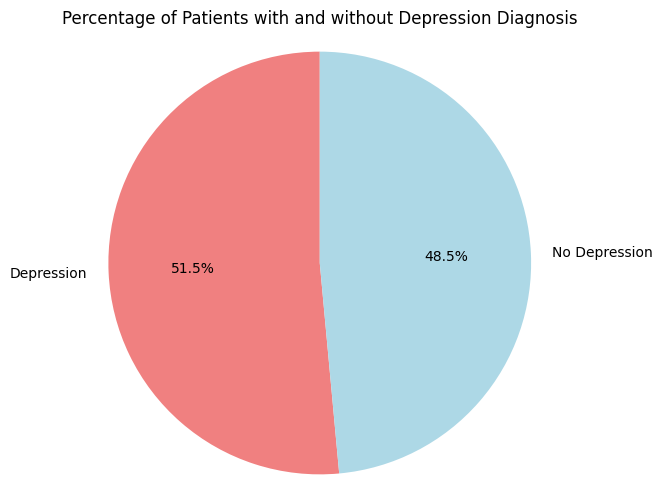

In [18]:
# Total number of patients
total_patients = df_p.shape[0]

# Number of patients with a depression diagnosis
depression_count = df_p[df_p['Depression Diagnosis'] == True].shape[0]

# Calculate the percentage
depression_percentage = (depression_count / total_patients) * 100

print(f"Percentage of patients with a depression diagnosis: {depression_percentage:.2f}%")

# Values for the pie chart
values = [depression_count, total_patients - depression_count]
labels = ['Depression', 'No Depression']

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue'])
plt.title('Percentage of Patients with and without Depression Diagnosis')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle
plt.show()

`Question 2:` Which age group of OCD patients has the highest rate of depression diagnosis? (-> most at risk of developing depression)

to make it interactive: 
- allow the user to hover over the bar chart to get precise values
    - show total number in age group + part which is diagnosed with depression
    - show percentage in age group

C:\Users\katja\AppData\Local\Temp\ipykernel_79836\993518843.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_depression.index, y=age_depression.values, palette='coolwarm')


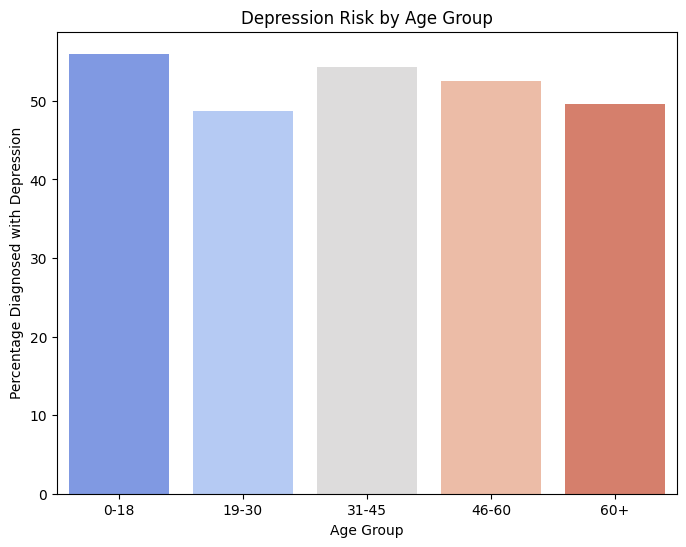

In [19]:
# Create age bins to group patients by age
age_bins = [0, 18, 30, 45, 60, 100]
age_labels = ['0-18', '19-30', '31-45', '46-60', '60+']
df_p['age_group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Group by age group and calculate the percentage of patients with depression
age_depression = df_p.groupby('age_group')['Depression Diagnosis'].mean() * 100

# Plot bar chart
plt.figure(figsize=(8,6))
sns.barplot(x=age_depression.index, y=age_depression.values, palette='coolwarm')
plt.title('Depression Risk by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage Diagnosed with Depression')
plt.show()

`Question 3:` What is the prevalence of depression diagnosis among men and women? 

to add for interactivity:
- Checkbox to toggle the display of men/women or both

Percentage of men with a depression diagnosis: 50.87%
Percentage of women with a depression diagnosis: 52.06%


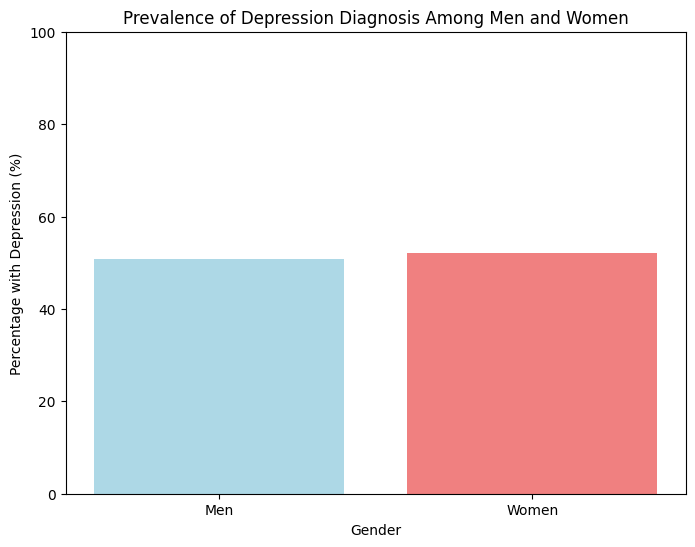

In [20]:
# 'Gender' is boolean: True = Male, False = Female

# Total number of male and female patients
total_men = df_p[df_p['Gender'] == True].shape[0]
total_women = df_p[df_p['Gender'] == False].shape[0]

# Number of men and women with a depression diagnosis
men_with_depression = df_p[(df_p['Gender'] == True) & (df_p['Depression Diagnosis'] == True)].shape[0]
women_with_depression = df_p[(df_p['Gender'] == False) & (df_p['Depression Diagnosis'] == True)].shape[0]

# Calculate the percentage of men and women with a depression diagnosis
men_depression_percentage = (men_with_depression / total_men) * 100 if total_men != 0 else 0
women_depression_percentage = (women_with_depression / total_women) * 100 if total_women != 0 else 0

# Print the results
print(f"Percentage of men with a depression diagnosis: {men_depression_percentage:.2f}%")
print(f"Percentage of women with a depression diagnosis: {women_depression_percentage:.2f}%")

# Bar chart for visualizing the prevalence of depression in men and women
gender_labels = ['Men', 'Women']
depression_percentages = [men_depression_percentage, women_depression_percentage]

plt.figure(figsize=(8, 6))
plt.bar(gender_labels, depression_percentages, color=['lightblue', 'lightcoral'])
plt.xlabel('Gender')
plt.ylabel('Percentage with Depression (%)')
plt.title('Prevalence of Depression Diagnosis Among Men and Women')
plt.ylim(0, 100)  # Set y-axis limits to 0-100%
plt.show()

---

### Tab 2: Diagnostic Analytics

`Question 1:` Is there a significant correlation between the severity of OCD (Y-BOCS scores) and the likelihood of depression?

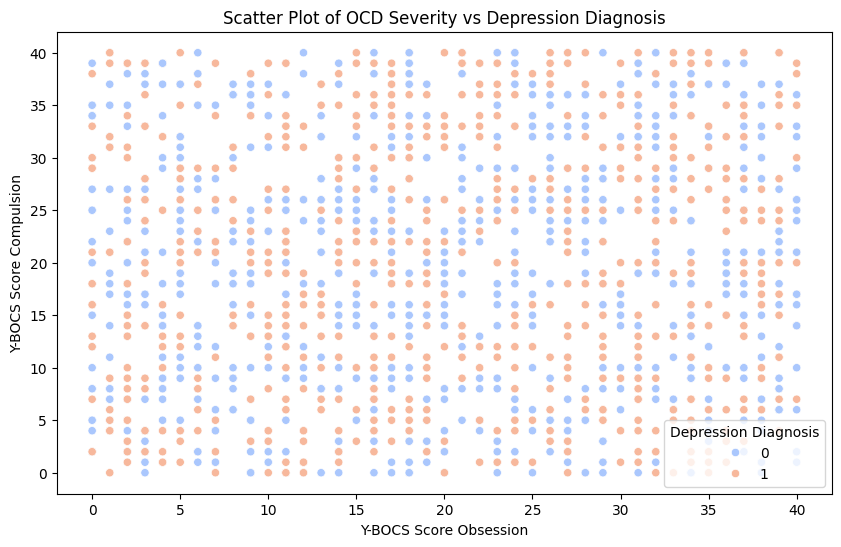

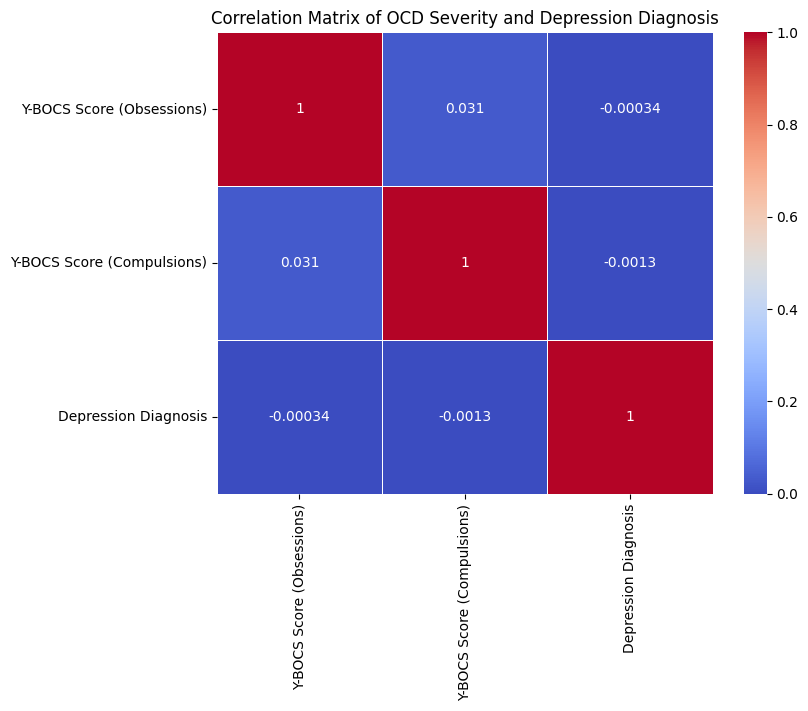

In [21]:
# Scatter plot for Y-BOCS scores (obsession and compulsion) vs depression diagnosis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Y-BOCS Score (Obsessions)', y='Y-BOCS Score (Compulsions)', hue='Depression Diagnosis', data=df_p, palette='coolwarm')
plt.title("Scatter Plot of OCD Severity vs Depression Diagnosis")
plt.xlabel("Y-BOCS Score Obsession")
plt.ylabel("Y-BOCS Score Compulsion")
plt.show()

# Correlation matrix for numerical variables
numerical_cols = ['Y-BOCS Score (Obsessions)', 'Y-BOCS Score (Compulsions)', 'Depression Diagnosis']
corr_matrix = df_p[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of OCD Severity and Depression Diagnosis")
plt.show()

---

### Tab 3: Predictive Analytics

Input features: `has to be checked!!`
- `age`
- `gender`
- `ethnicity`
- `martial status`
- `education level`
- `duration of symptoms`
- `previous diagnosis`
- `family history of OCD`
- `obsession type`
- `compulsion type`
- `Y-BOCS score obsession`
- `Y-BOCS score compulsion`
- `anxiety diagnosis`
- `medications`

Binary target class
- `Depression Diagnosis`

In [22]:
import numpy as np
# Set the seed of the pseudo randomization to guarantee that results are reproducible between executions
RANDOM_SEED = 2023
np.random.seed(RANDOM_SEED)

In [23]:
# Drop columns which are not needed, only keep input features and the target variable
df_p.drop(columns=["Patient ID"], inplace=True)
df_p

,Age,Gender,Duration of Symptoms (months),Family History of OCD,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Compulsion_Type_Checking,Compulsion_Type_Washing,...,Previous Diagnoses_None,Previous Diagnoses_PTSD,Previous Diagnoses_GAD,Previous Diagnoses_Panic Disorder,Obsession Type_Harm-related,Obsession Type_Contamination,Obsession Type_Symmetry,Obsession Type_Hoarding,Obsession Type_Religious,age_group
0,32,1,203,0,17,10,1,1,1,0,...,1,0,0,0,0,1,0,0,0,31-45
1,69,0,180,1,21,25,1,1,0,0,...,0,1,0,0,0,1,0,0,0,60+
2,57,0,173,0,3,4,0,0,1,0,...,1,0,0,0,1,0,0,0,0,46-60
3,27,1,126,1,14,28,1,1,0,0,...,0,0,1,0,0,0,0,0,1,19-30
4,56,1,168,1,39,18,0,0,0,0,...,0,0,1,0,0,0,1,0,0,46-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,38,0,53,0,21,33,1,1,0,0,...,1,0,0,0,1,0,0,0,0,31-45
1496,19,1,160,1,25,16,1,1,0,0,...,0,0,0,0,0,0,1,0,0,19-30
1497,40,0,100,1,2,15,1,1,0,1,...,0,1,0,0,1,0,0,0,0,31-45
1498,37,1,210,1,16,7,1,0,0,0,...,0,0,0,0,1,0,0,0,0,31-45
